In [25]:
import torch
from torch.autograd.functional import hessian
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
from scipy.optimize import minimize

# Load test samples
from aeons.tools import pickle_in
samples_g_1, samples_c_1, samples_w_1 = pickle_in("../test_samples/samples_1.pickle")

from aeons.covariance import logX_mu, logX_Sigmainv, points_at_iteration, X_mu, X_Sigma, X_Sigmainv, data_at_iteration
from aeons.true_distribution import generate_Xs, nk_dead, nk_dead_live, nk_live
from aeons.bayes import logPr_bayes, logPr_laplace, logPr_gaussian, minimise_ls, minimise_bayes, minimise_gaussian
from aeons.likelihoods import likelihood, linear_like, quad_like, log_like, simple_like, middle_like, full_like
linear, quad, log = linear_like(), quad_like(), log_like()
simple, middle, full = simple_like(), middle_like(), full_like()
from models import LS, CG, CG_naive, freq_std

### **Weighted LS**

In [18]:
nk = nk_dead_live(nlive=500, ndead=500)
mean_X = X_mu(nk)
covinv_X = X_Sigmainv(nk)
cov_X = X_Sigma(nk)

In [26]:
def logPr_weighted(y, likelihood, mean, cov, theta):
    loss = mean - likelihood.inverse(y, theta)
    weights = np.diagonal(cov)
    Lsq = np.sum((loss**2)/weights)
    return -1/2 * Lsq

def minimise_weighted(y, likelihood, mean, cov, x0):
    def func(theta):
        return - logPr_weighted(y, likelihood, mean, cov, theta)
    solution = minimize(func, x0)
    return solution.x

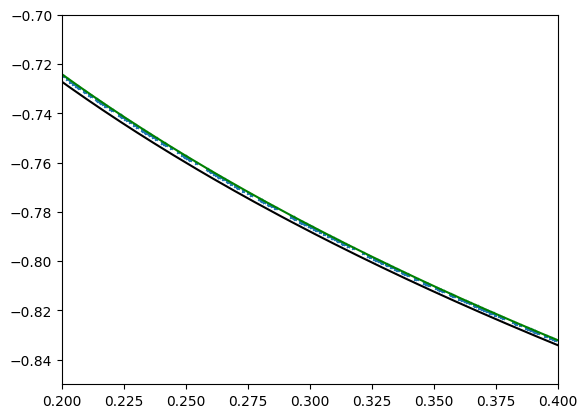

In [150]:
like = simple
theta_true = 10
X = generate_Xs(nk)
y = simple.func(X, theta_true)
theta_w = minimise_weighted(y, like, mean_X, cov_X, theta_true)
theta_l = minimise_weighted(y, like, mean_X, np.eye(len(y)), theta_true)
plt.plot(X, y, 'x', ms=2)
plt.plot(like.inverse(y, theta_w), y, color='green')
plt.plot(like.inverse(y, theta_l), y, color='black')
plt.xlim(0.2, 0.4);
plt.ylim(-0.85, -0.7);

In [265]:
ds = []
for i in range(500):
    X = generate_Xs(nk)
    y = simple.func(X, theta_true)
    d = minimise_weighted(y, like, mean_X, cov_X, theta_true)
    ds.append(d)
np.mean(ds), np.std(ds)

(10.003592092573781, 0.3473401629882951)

In [266]:
ds = []
for i in range(500):
    X = generate_Xs(nk)
    y = simple.func(X, theta_true)
    d = minimise_weighted(y, like, mean_X, np.eye(len(y)), theta_true)
    ds.append(d)
np.mean(ds), np.std(ds)

(10.01716387905268, 0.41211584233773985)